<center><font size=10>Personal Loan Campaign</font></center>

## Problem Statement

### Business Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).
A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.
You as a Data Scientist at AllLife Bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and to identify which segment of customers to target more.

### Data Description

<ul>
<li>ID: Customer ID</li>
<li>Age: Customer’s age in completed years</li>
<li>Experience: # years of professional experience</li>
<li>Income: Annual income of the customer (in thousand dollars)</li>
<li>ZIP Code: Home Address ZIP code.</li>
<li>Family: The family size of the customer</li>
<li>CCAvg: Average spending on credit cards per month (in thousand dollars)</li>
<li>Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional</li>
<li>Mortgage: Value of house mortgage if any. (in thousand dollars)</li>
<li>Personal_Loan: Did this customer accept the personal loan offered in the last campaign?</li>
<li>Securities_Account: Does the customer have a securities account with the bank?</li>
<li>CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?</li>
<li>Online: Do customers use Internet banking facilities?</li>
<li>CreditCard: Does the customer use a credit card issued by any other Bank (excluding All Life Bank)?</li>
</ul>

## Importing the necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
# uncomment and run the following line if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
machine_failure_data = pd.read_csv("/content/drive/MyDrive/Great Learning AIML course/2nd Month Machine Learning/Personal Loan Campaign Project/Loan_Modelling.csv")

In [118]:
# copying data to another variable to avoid any changes to original data
data = machine_failure_data.copy()

## Overview of the dataset

### View the first and last 5 rows of the dataset.

In [119]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [120]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


* There are three types of customers those are 1, 2, and 3 (Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional).
* The `ID` column is containing unique values.


### Understand the shape of the dataset.

In [121]:
data.shape

(5000, 14)

* The dataset has 5000 rows and 14 columns.

### Check the data types of the columns for the dataset.

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* There are 14 numerical and 0 categorical variables in the data.


### Checking for missing values

In [123]:
# checking for null values
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


* There are no null values in the dataset

### Dropping the duplicate values

In [124]:
# checking for duplicate values
data.duplicated().sum()

np.int64(0)

* There are no duplicate values in the data.

### Statistical summary of the data

**Let's check the statistical summary of the data.**

In [125]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


- On average, customers have an annual household income of ~$74k
- The age of the customers ranges from 23 to 67 years.
- The Average customers Education Level is 1.

## Exploratory Data Analysis (EDA) Summary

**The below functions need to be defined to carry out the EDA.**

In [126]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [127]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [128]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [129]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

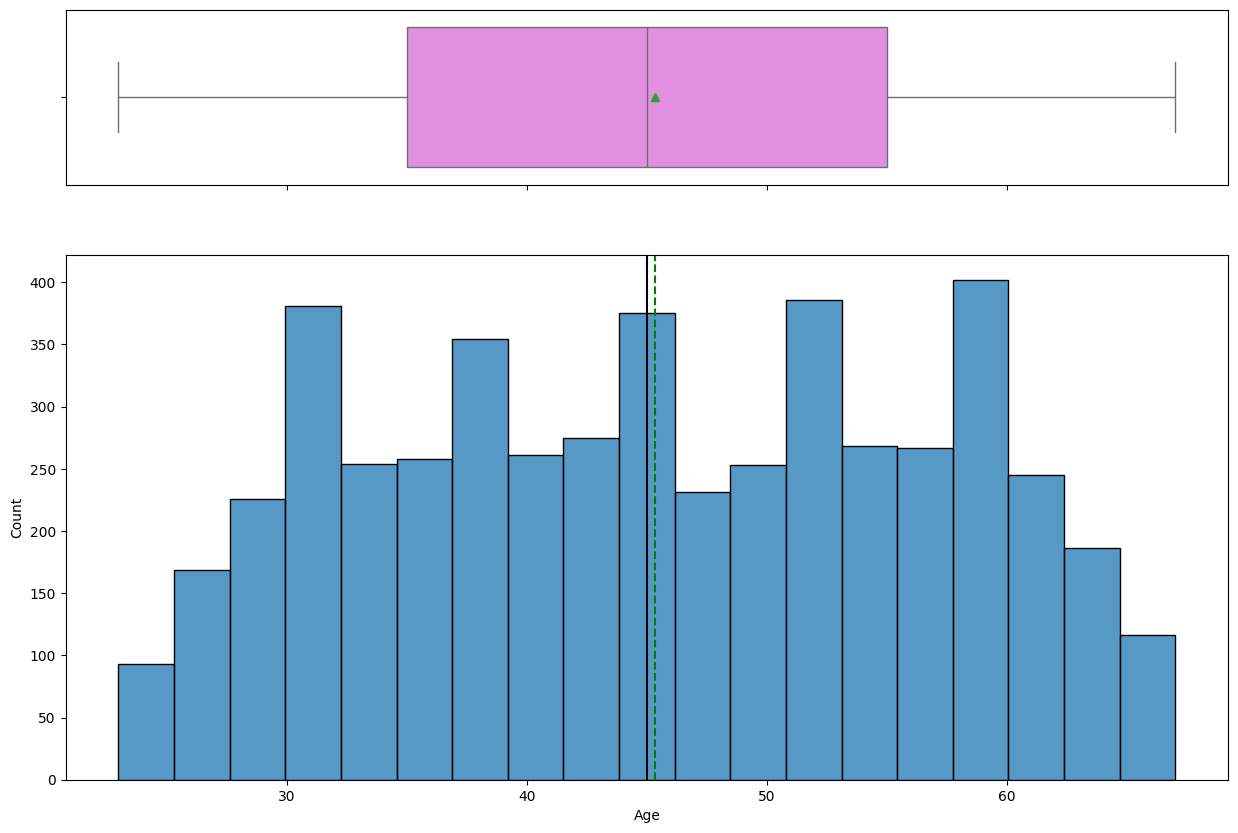

In [130]:
histogram_boxplot(data, "Age")

* The `Age` distribution looks slightly left skewed with a mean age around 46 years.
* There is no outlier present.

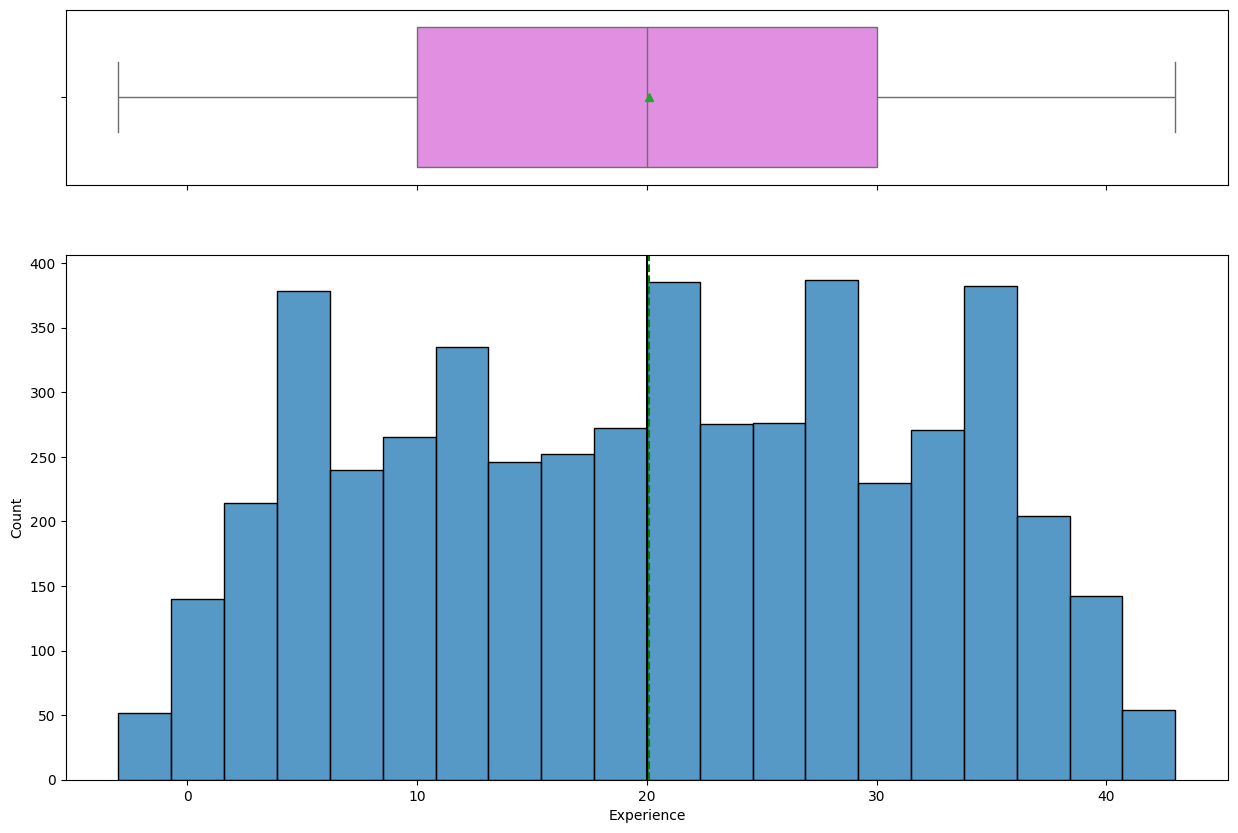

In [131]:
histogram_boxplot(data, "Experience")

* The `Experience` distribution looks perfect there is no skewed a mean Experience around 20 Yeras.
* There is no outlier present.

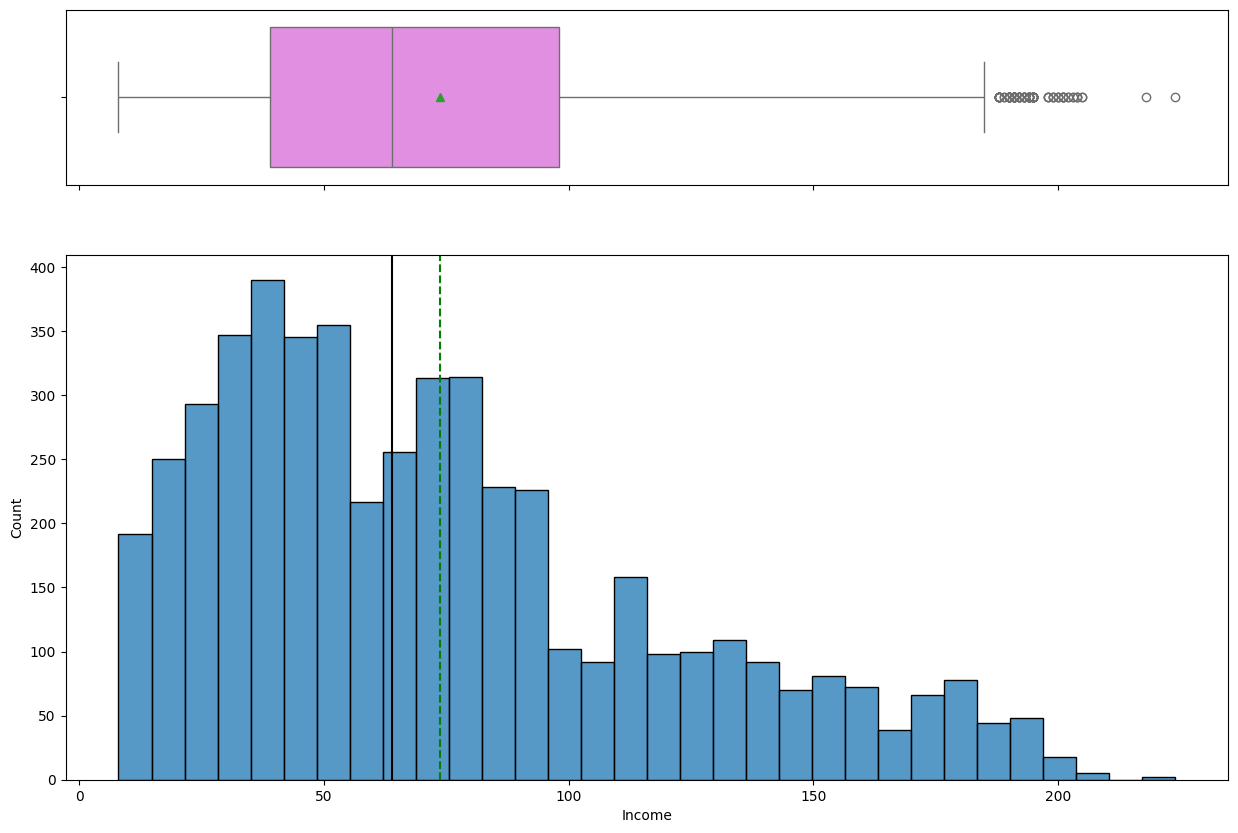

In [132]:
histogram_boxplot(data, "Income")

* The `Income` is right skewed with many outliers on the upper quartile.
* Some of the custemers Income are a higher.

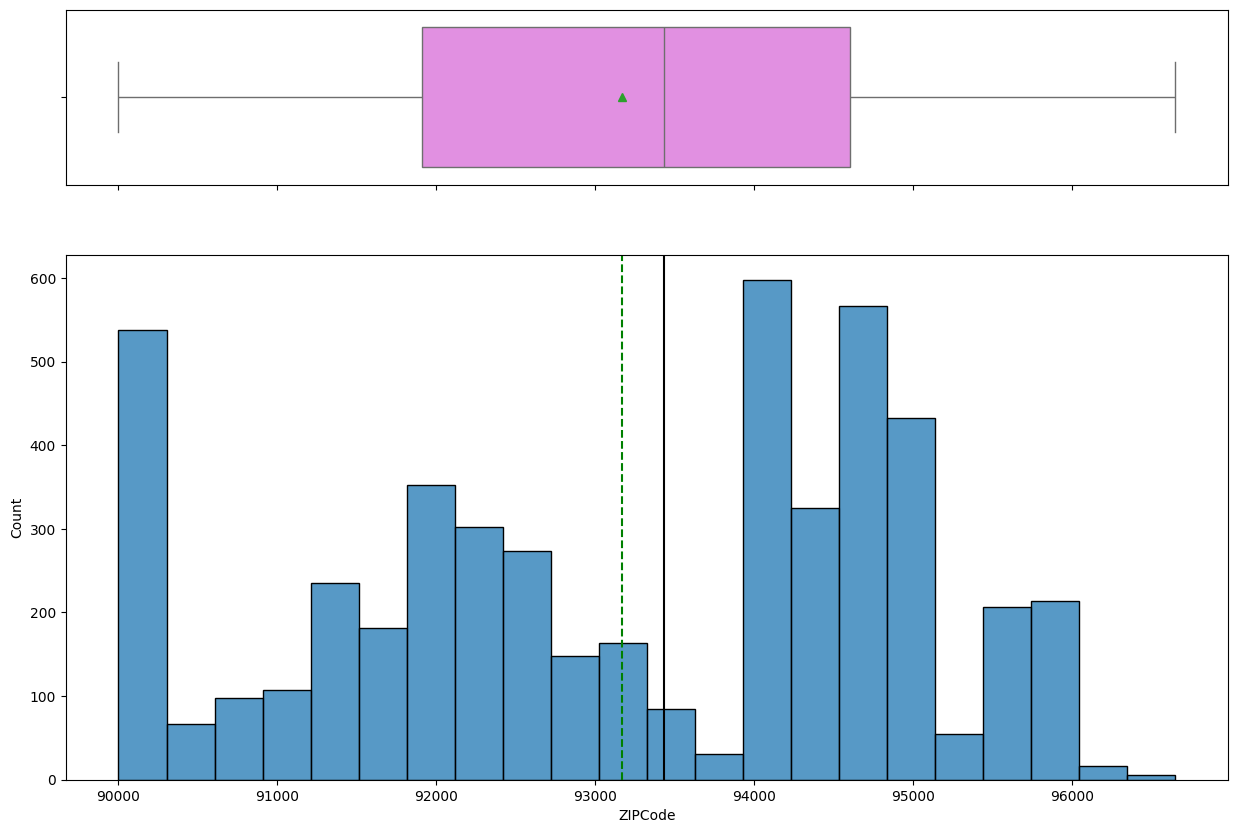

In [25]:
histogram_boxplot(data, "ZIPCode")

* The distribution of `ZIPCode` is left skewed most of the custembers belong from Zip code 90000 to 93000.
* Outliers are not present.

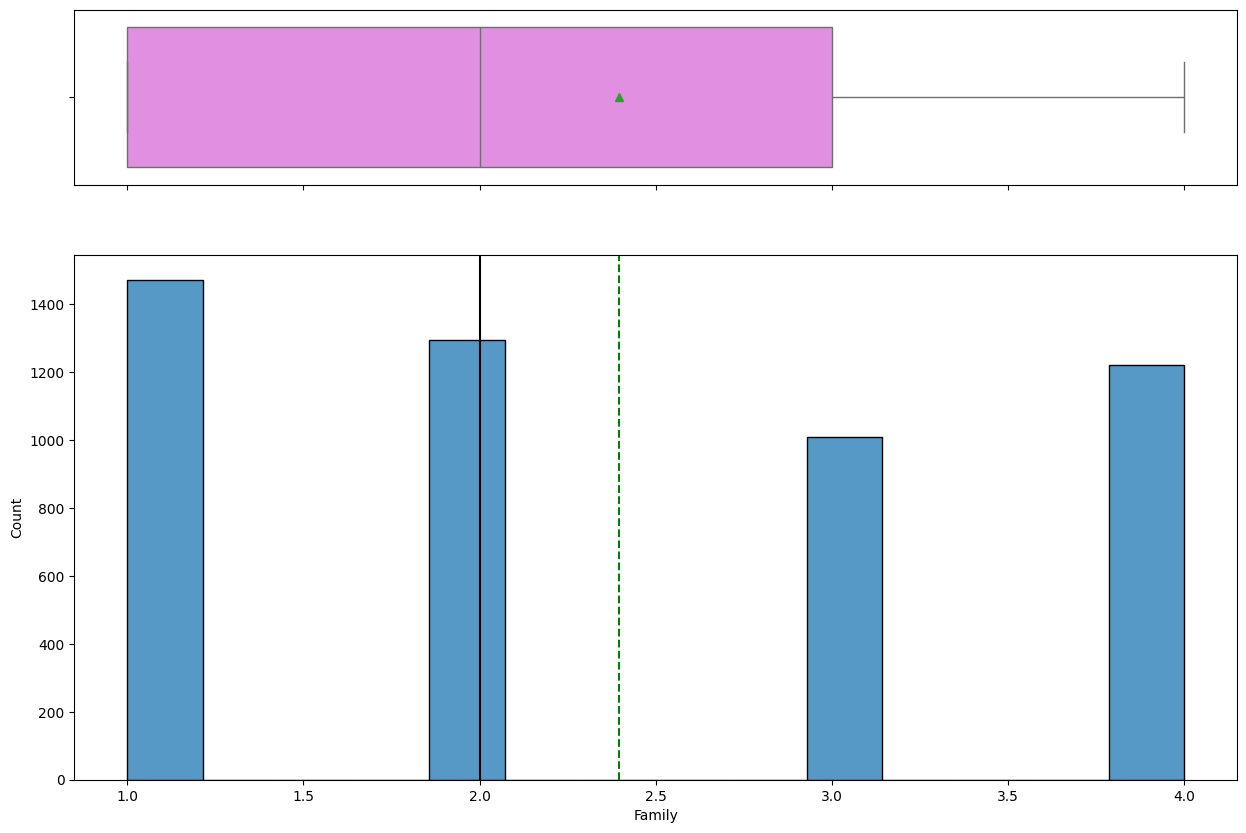

In [133]:
histogram_boxplot(data, "Family")

* `Family` is left skewed distributed with some of the higher values.
* Outliers are not present.

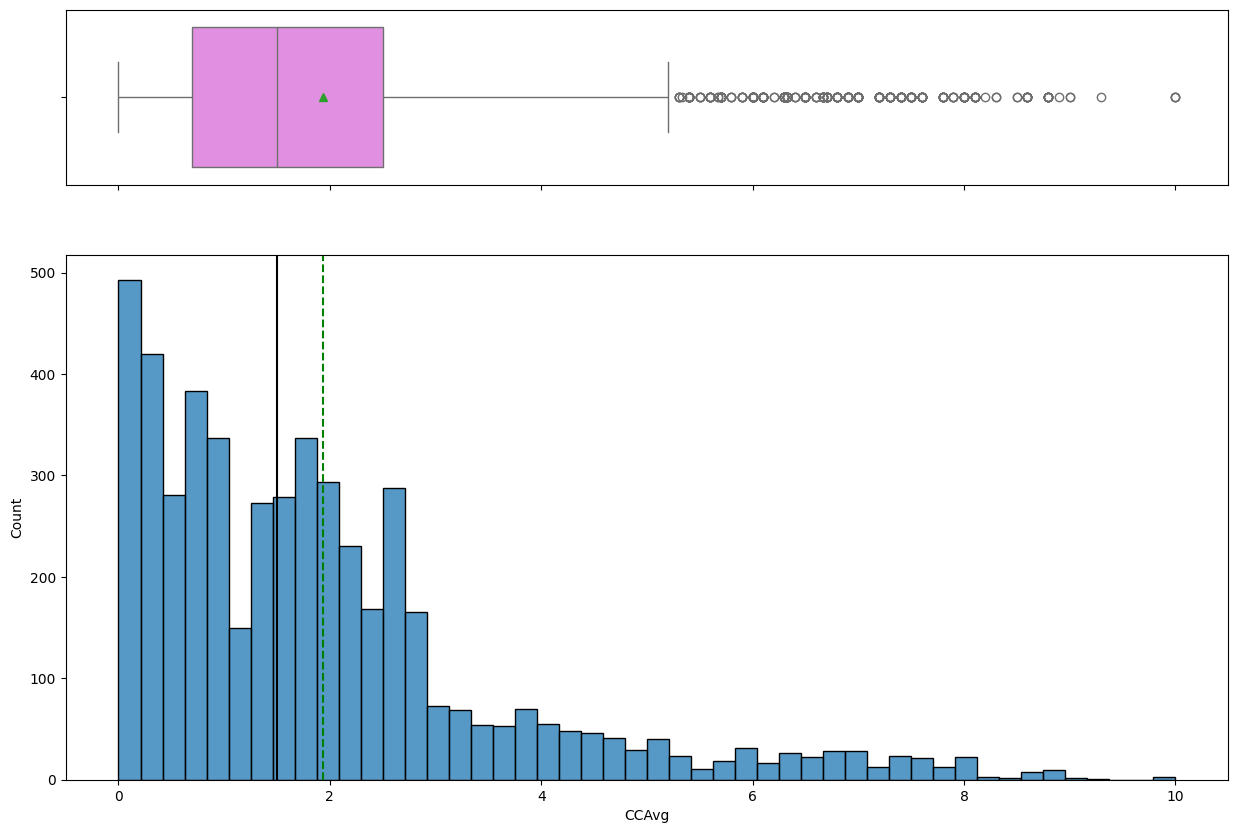

In [28]:
histogram_boxplot(data, "CCAvg")

* The `CCAvg` is right skewed with many outliers on the upper quartile.
* Some of the customer are spending more.

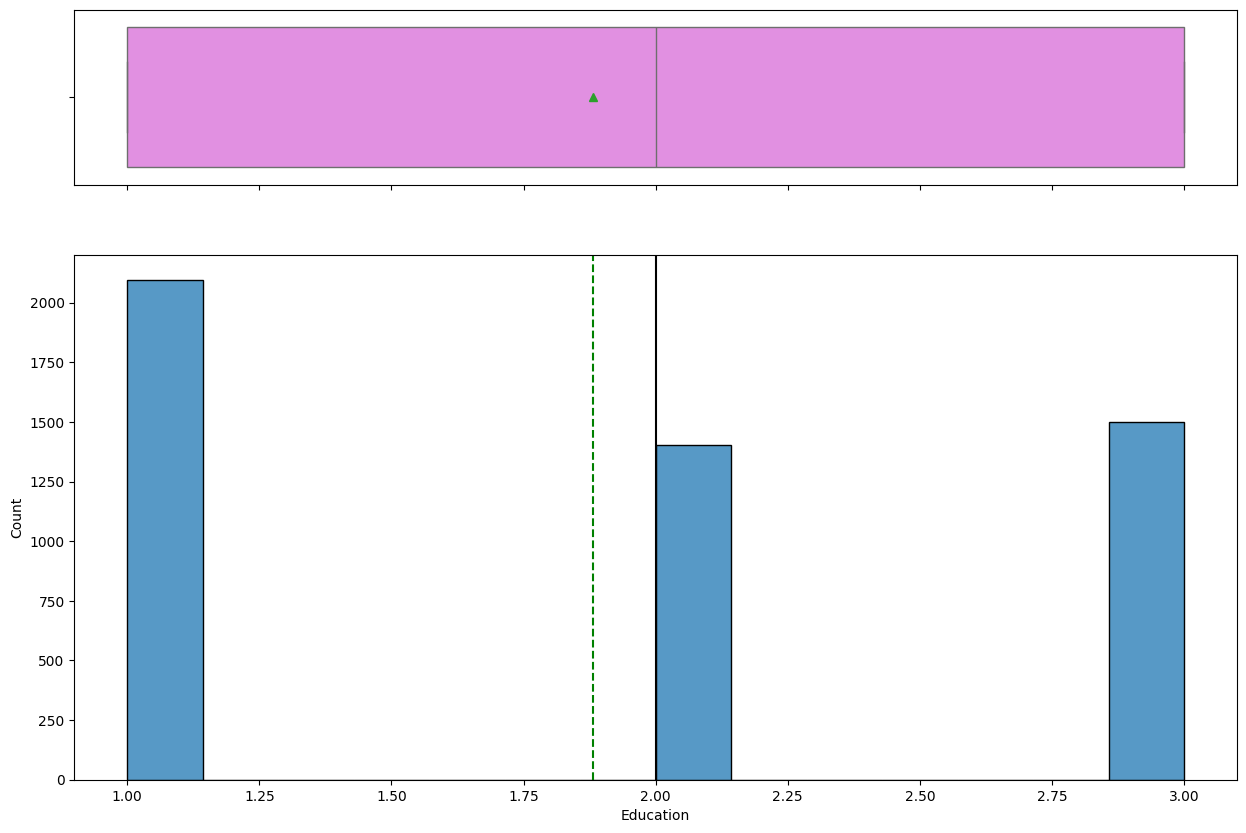

In [134]:
histogram_boxplot(data, "Education")

 - `Education` is uniformly distributed with some of the middle values being less frequent.

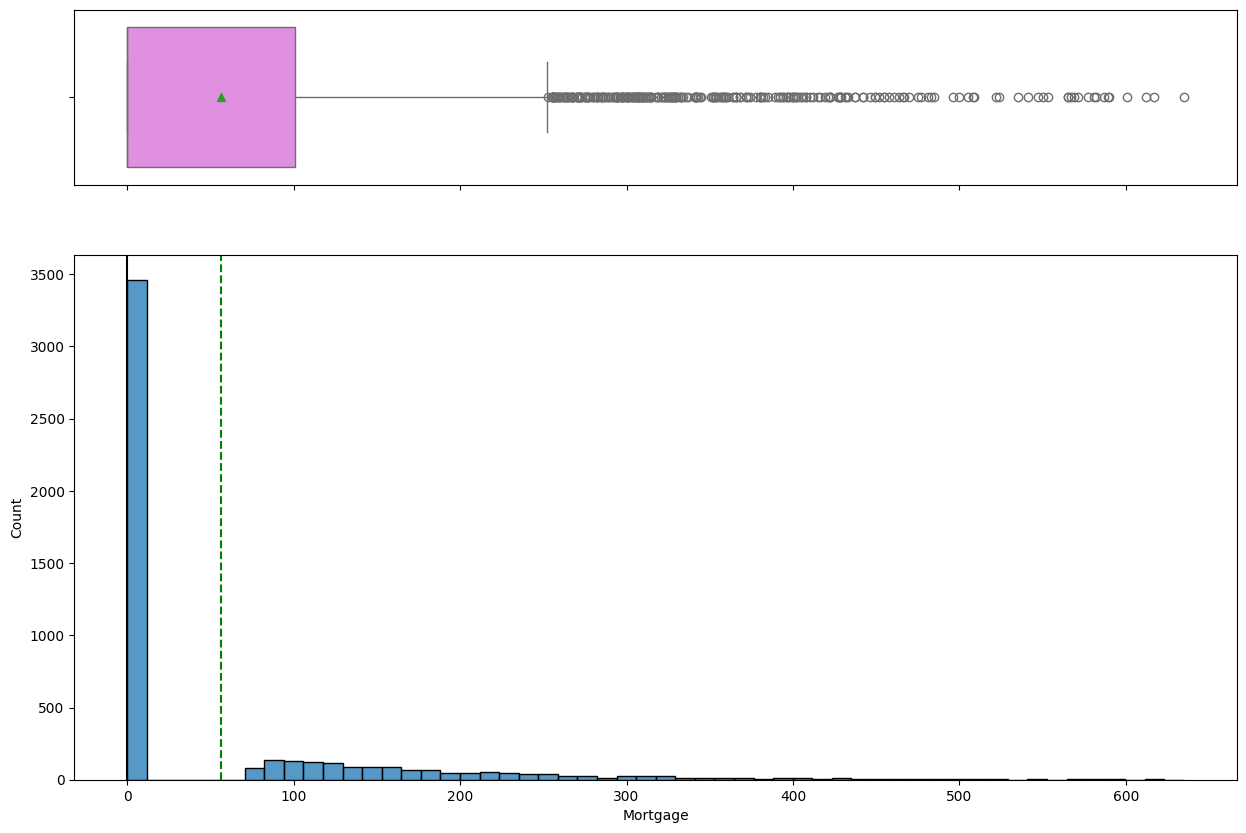

In [30]:
histogram_boxplot(data, "Mortgage")

 - The `Mortgage` is right skewed with many outliers on the upper quartile.
Some of the customer are haveing more Mortgages.

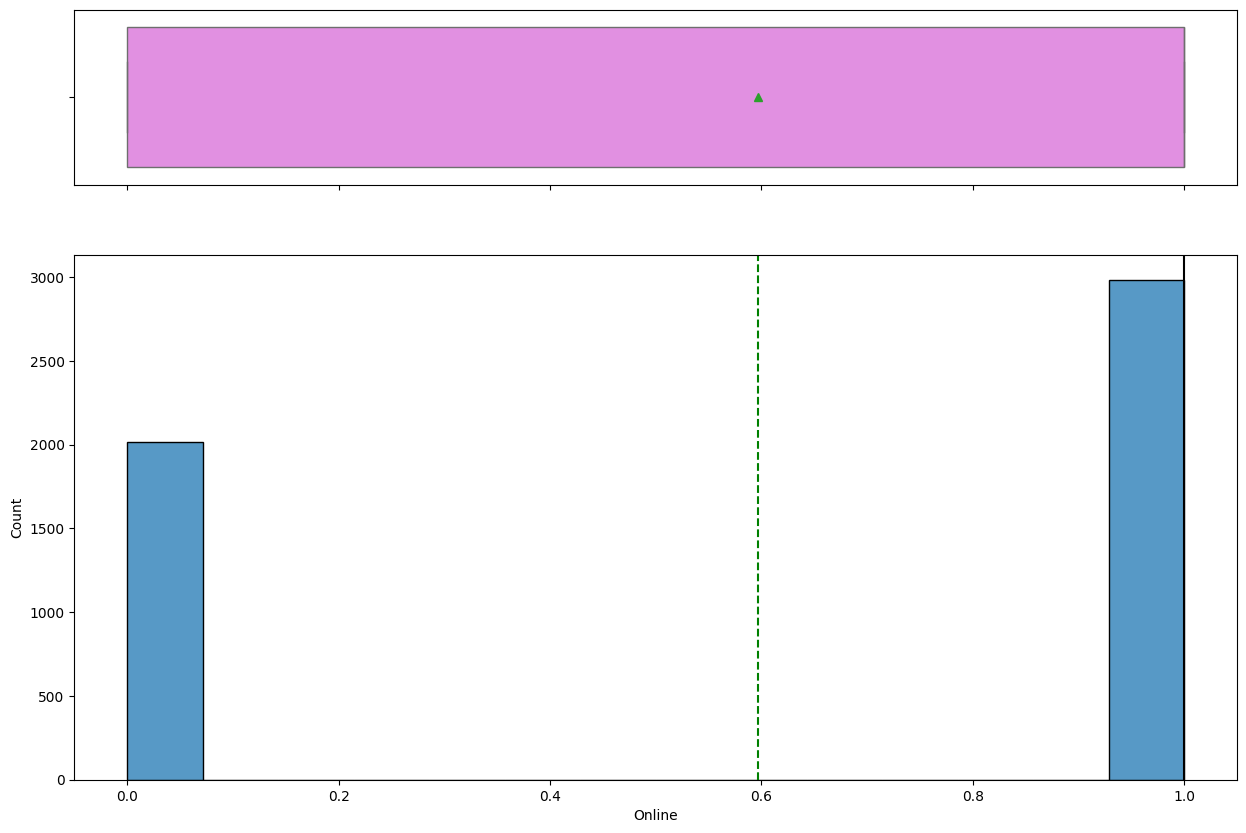

In [33]:
histogram_boxplot(data, "Online")

 - it's greater than the 75th percentile — possibly an outlier or anomalous in the context of the distribution.
 - There is no outlier
 - The y-axis remains flat, confirming this is likely a 1D distribution

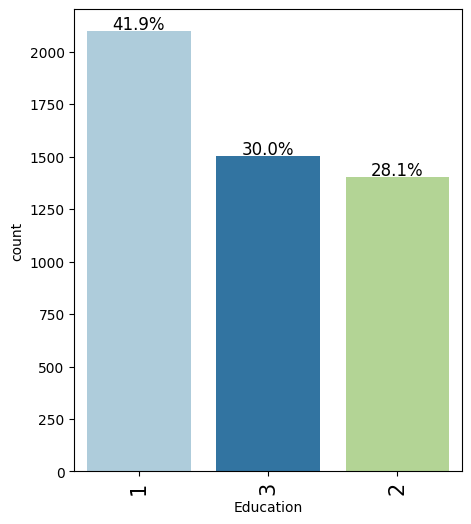

In [136]:
labeled_barplot(data, "Education", perc=True)

* Around 42% of custemers are holding Education level 1, 30% are Education level 2 and 28%  Education level 3

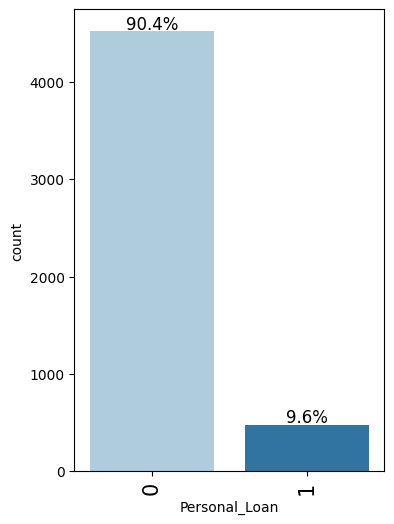

In [137]:
labeled_barplot(data, "Personal_Loan", perc=True)

* In 90.4% of observations the custember not accept the personal loan offered in the last campaign while in 9.6% of observations custember accept the personal loan offered in the last campaign.

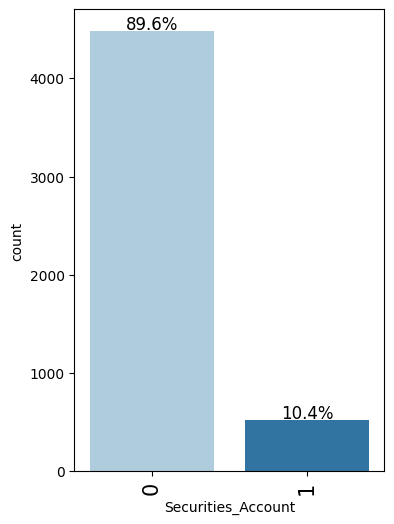

In [138]:
labeled_barplot(data, "Securities_Account", perc=True)

- In 89.6% of observations the custember not have the Securities Account while in 10.4% of observations custember have the Securities Account.

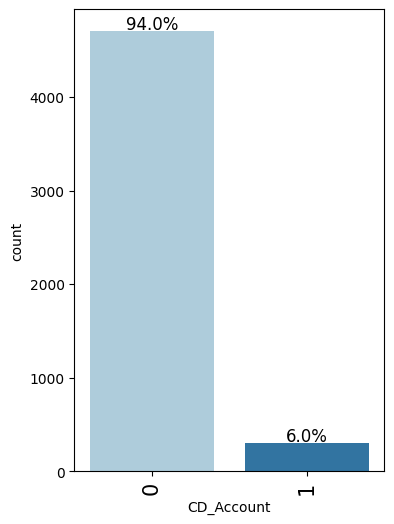

In [139]:
labeled_barplot(data, "CD_Account", perc=True)

- The 94.0% of the customer doesn't have a certificate of deposit (CD) account with the bank while 6.0% customer have a certificate of deposit (CD) account with the bank

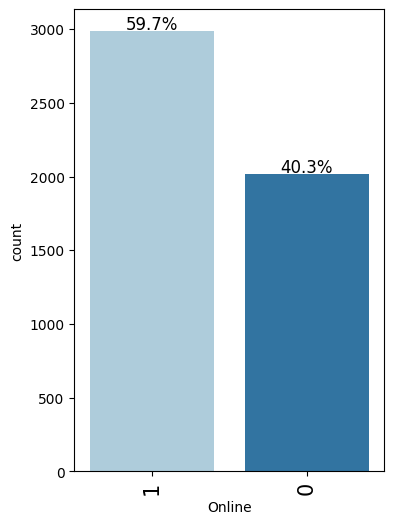

In [140]:
labeled_barplot(data, "Online", perc=True)

- 59.7% of the customers use Internet banking facilities while 40.3% customers not use Internet banking facilities.

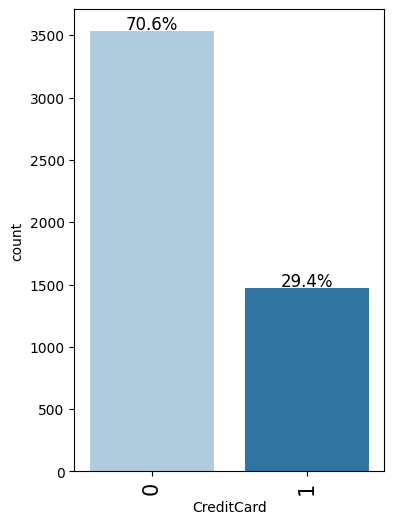

In [141]:
labeled_barplot(data, "CreditCard", perc=True)

- 70.6% of the customer not use a credit card issued by any other Bank while 29.4% customer do.

### Bivariate Analysis

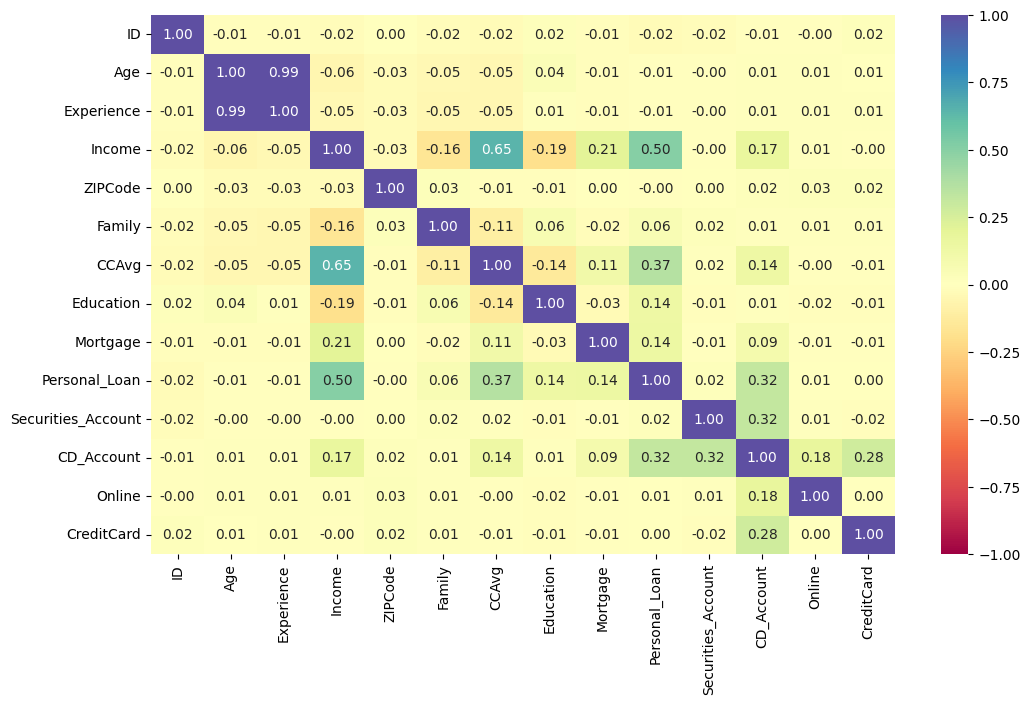

In [142]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* The Age has a high positive correlation with the Experience of the customer.
* The Income is positive correlation with Personal_Loan and CCAVG of the customer, indicating that customers with higher incomes tend to spend more by credit card from the lower income customers.

**Let's see how the target variable varies across the type of the product**

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


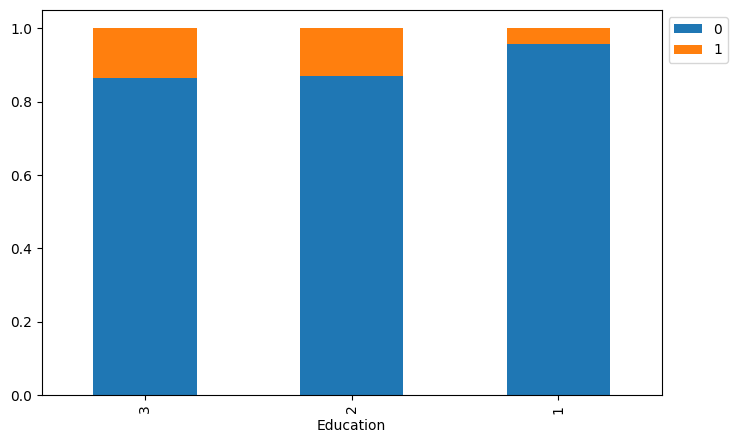

In [143]:
stacked_barplot(data, "Education", "Personal_Loan")

* Around 95 % of the custemer doesn't accept the Personal Loan who's education level 1 in offered in the last campaign.
* With lower Education Level having the higher acceptance of Personal Loans.

**Let's analyze the relation between `Income` and `Education`.**

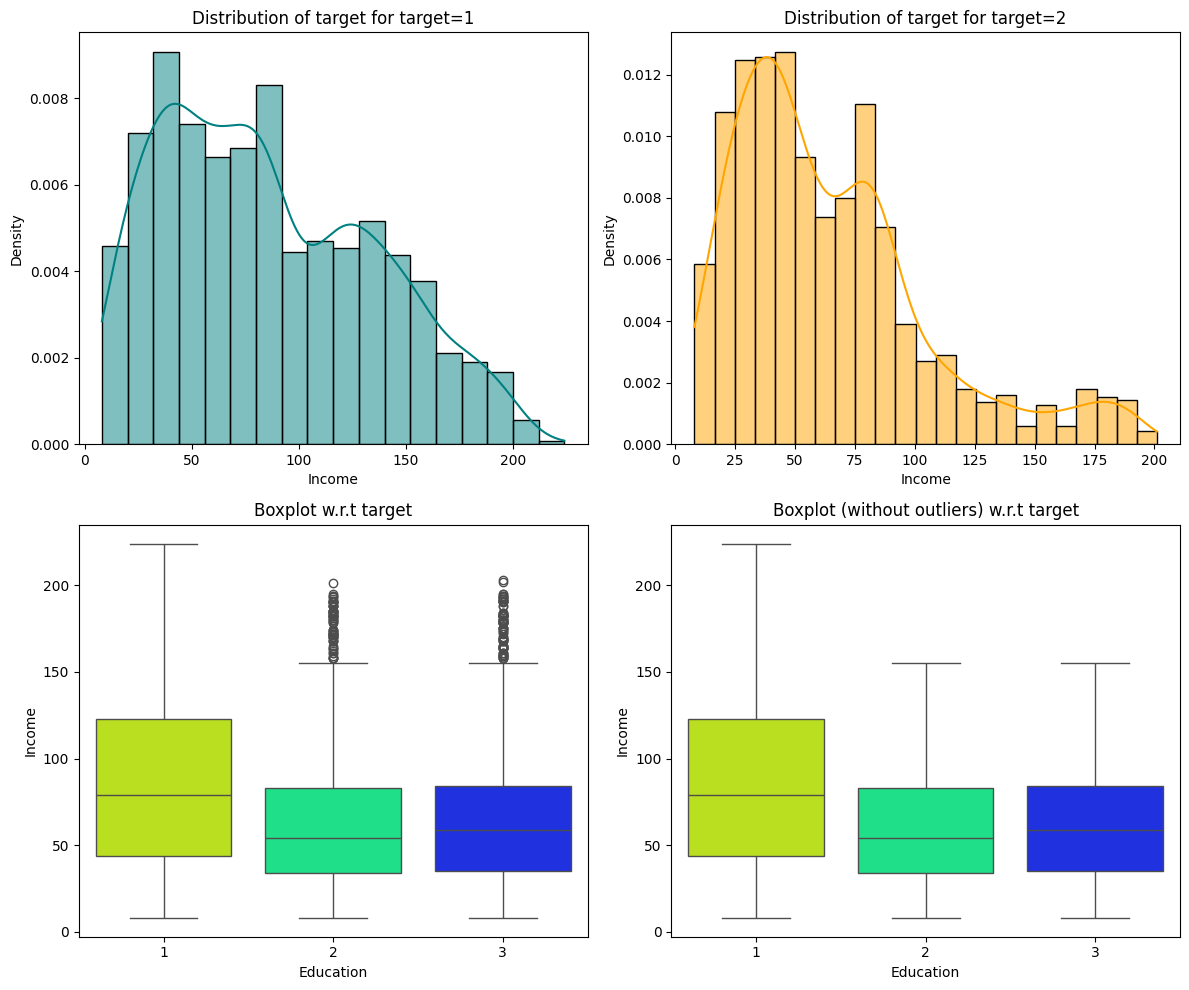

In [144]:
distribution_plot_wrt_target(data, "Income", "Education")

* Most of the higher income customer's are in the `Education` level 2 and 3.

**Let's analyze the relation between `Rotational speed` and `Failure`.**

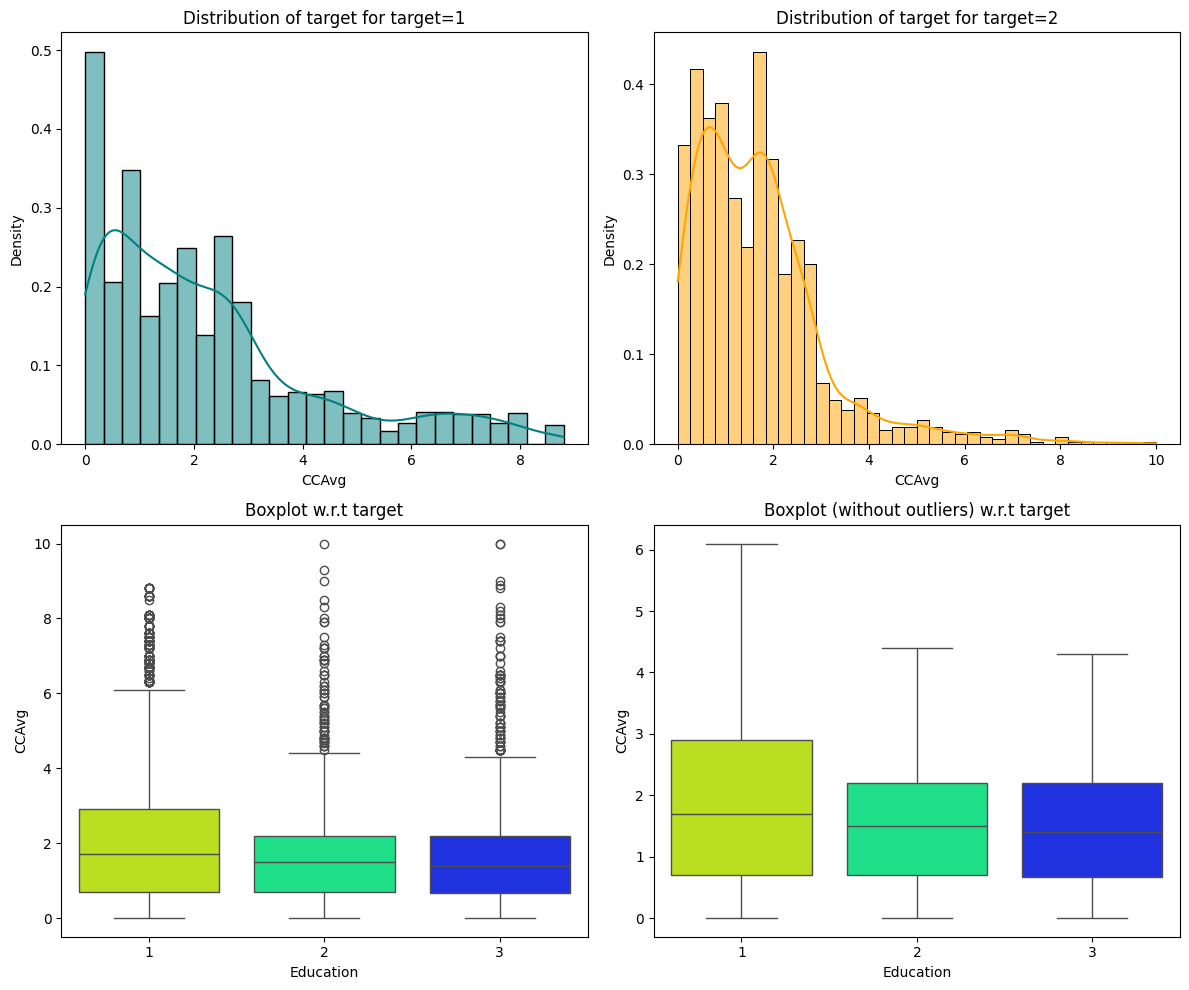

In [145]:
distribution_plot_wrt_target(data, "CCAvg", "Education")

* There is a clearly showing of `CCAvg` based on the values of `Education` Level.
* The Custembers having education level 2, 3 are spending more by credit cards.

## Data Preprocessing

### Outlier Detection

**Let's check for outliers in the data.**

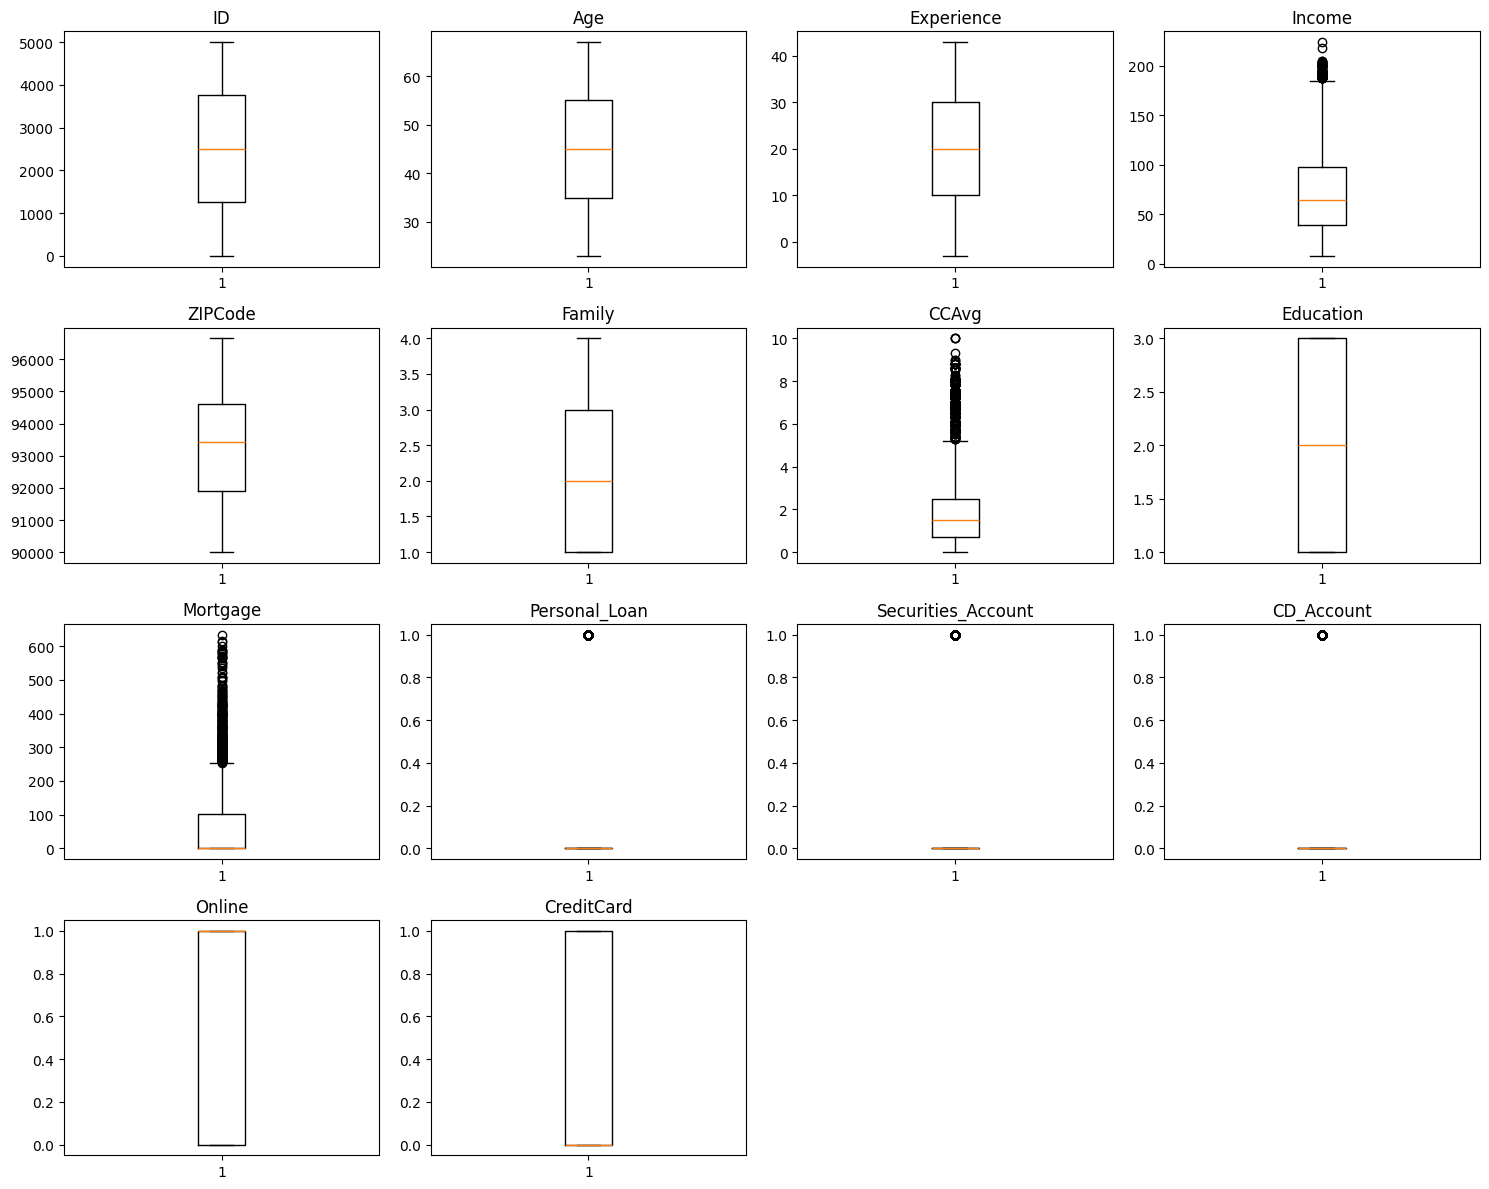

In [146]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations

* There are quite a few outliers in the data.
* However, we will not treat them as they are proper values

### Data Preparation for Modeling

In [147]:
X = data.drop(["Education"], axis=1)
Y = data["Education"]

X = pd.get_dummies(X, drop_first=True)

X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [148]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 13)
Shape of test set :  (1500, 13)
Percentage of classes in training set:
Education
1    0.415714
3    0.302000
2    0.282286
Name: proportion, dtype: float64
Percentage of classes in test set:
Education
1    0.427333
3    0.296000
2    0.276667
Name: proportion, dtype: float64


* We had seen that around 41.5% of observations belongs to Education Level 1  and 29.6% observations belongs to Education Level 2 , and 28.22% observations belongs to Education Level 3 and this is preserved in the train and test sets

## Model Building

### Model Evaluation Criterion

In [149]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall, changed to 'weighted' for multiclass
    precision = precision_score(target, pred, average='weighted')  # to compute Precision, changed to 'weighted' for multiclass
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score, changed to 'weighted' for multiclass

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [150]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    Plot the confusion matrix with absolute values and percentages.

    Parameters:
    - model: Trained classifier
    - predictors: Independent variables (X)
    - target: True labels (y)
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    total = cm.sum()

    # Create label strings with count and percentage
    labels = np.array([
        f"{value}\n{value / total:.2%}" for value in cm.flatten()
    ]).reshape(cm.shape)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=labels, fmt='', cmap='Purples', cbar=False,
                xticklabels=np.unique(target), yticklabels=np.unique(target))
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title("Confusion Matrix with Percentages")
    plt.tight_layout()
    plt.show()

### Decision Tree (default)

In [151]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

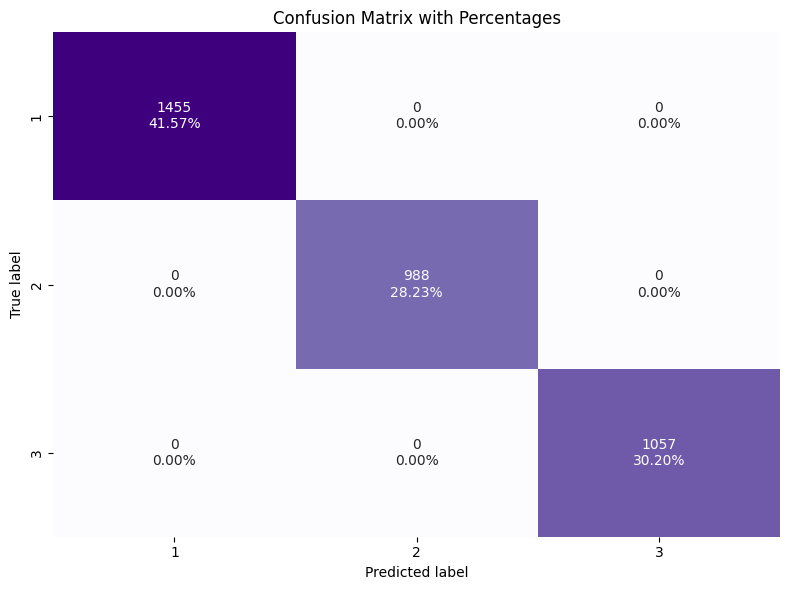

In [152]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [153]:
decision_tree_default_perf_train = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_default_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


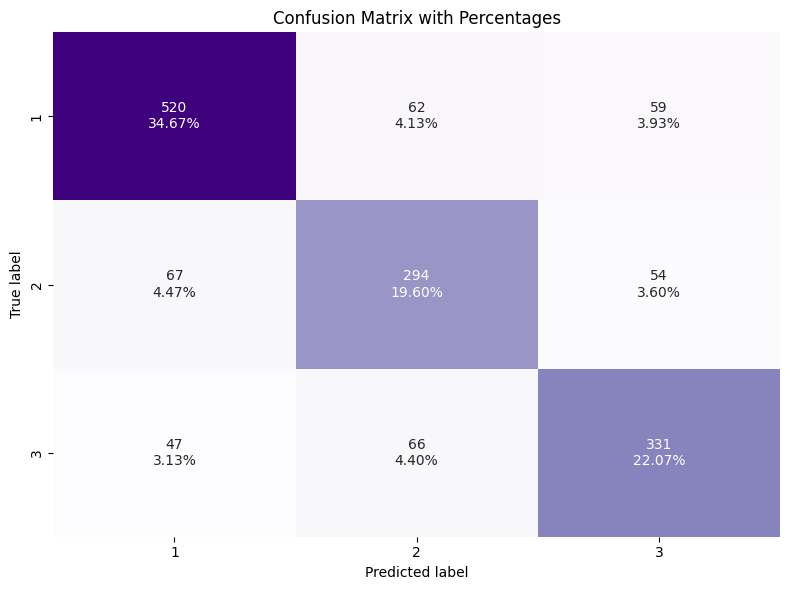

In [154]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [155]:
decision_tree_default_perf_test = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_default_perf_test

,Accuracy,Recall,Precision,F1
0,0.763333,0.763333,0.76391,0.763597


### Decision Tree (with class_weights)

In [156]:
model1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

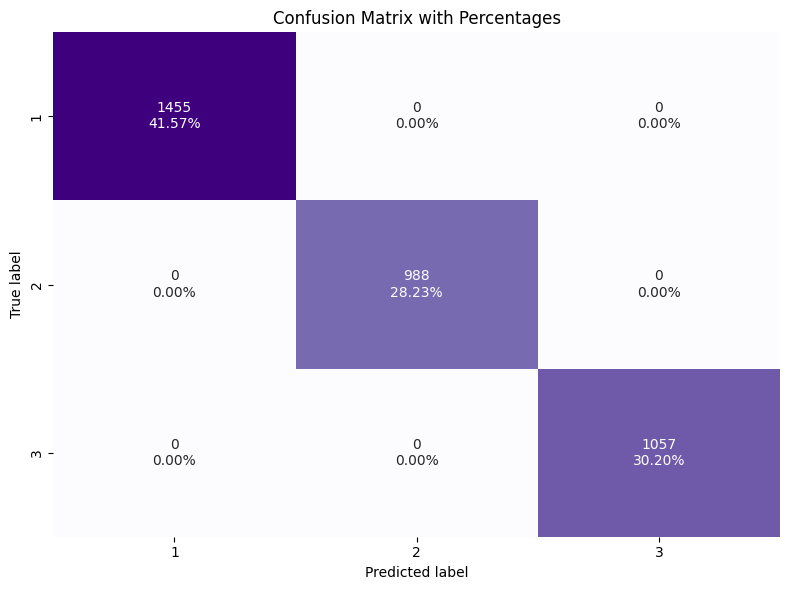

In [157]:
confusion_matrix_sklearn(model1, X_train, y_train)

In [158]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

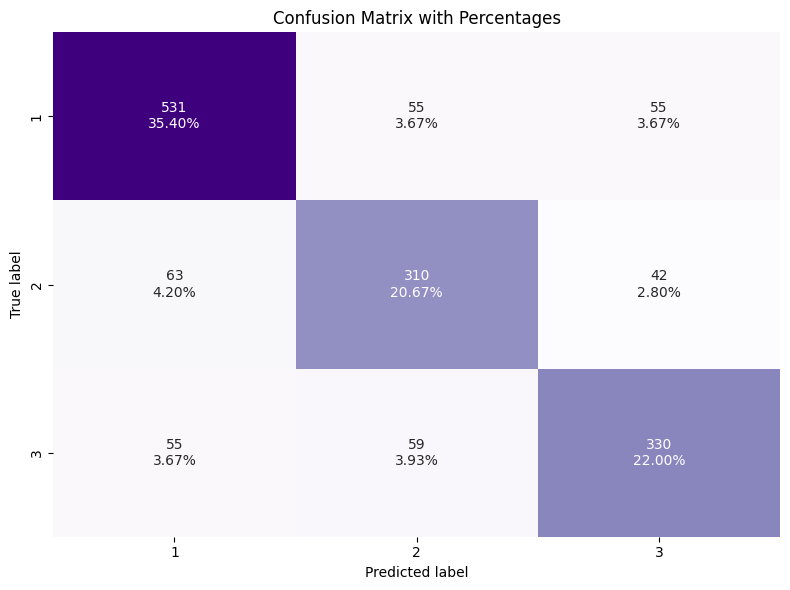

In [159]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [160]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.780667,0.780667,0.780675,0.780548


* There is no disparity in the model's performance between the training and test sets, indicating that the model is well-tuned.

**Let's use pruning techniques to check the overfitting.**

### Decision Tree (Pre-pruning)

In [161]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred, average='weighted')
            test_recall_score = recall_score(y_test, y_test_pred, average='weighted')

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 0.42733333333333334


In [162]:
# creating an instance of the best model
model2 = best_estimator

# fitting the best model to the training data
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(2),
                       max_leaf_nodes=50, min_samples_split=10,
                       random_state=42)

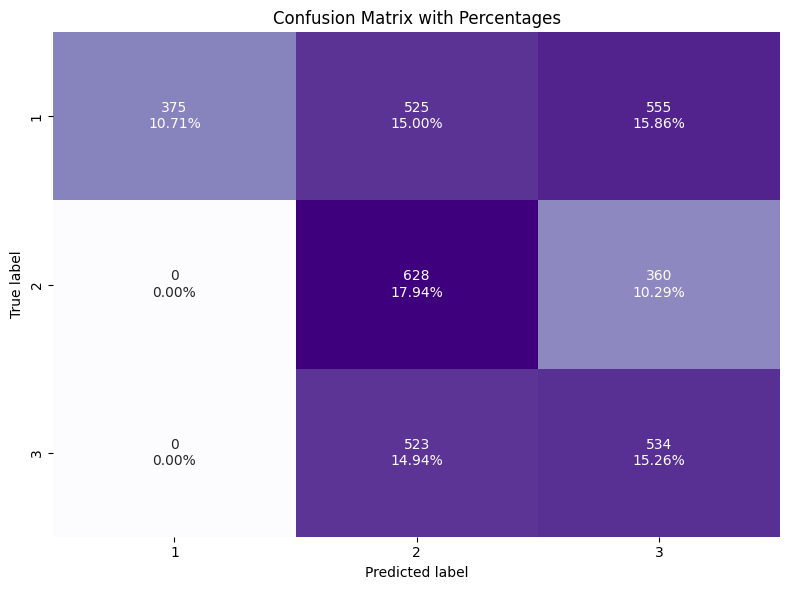

In [163]:
confusion_matrix_sklearn(model2, X_train, y_train)

In [164]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model2, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.439143,0.439143,0.632783,0.43217


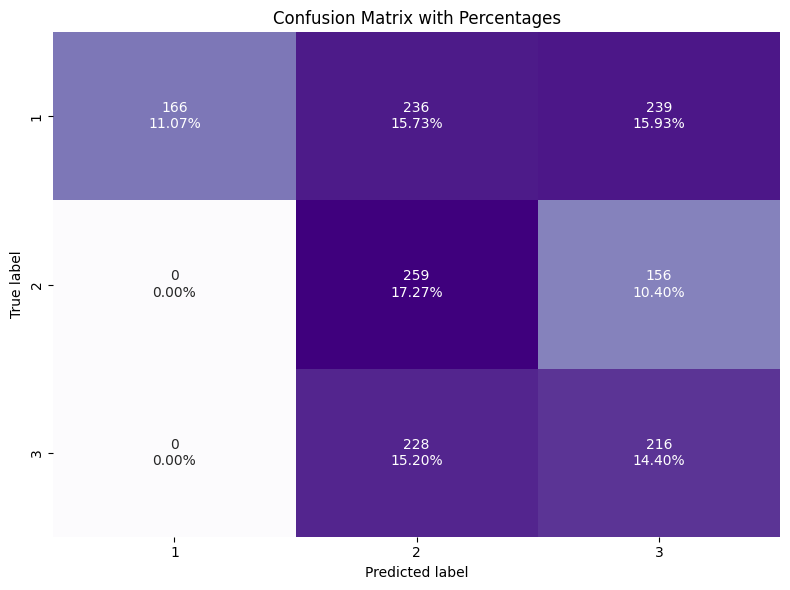

In [165]:
confusion_matrix_sklearn(model2, X_test, y_test)

In [166]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    model2, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.427333,0.427333,0.631085,0.422945




* The model is giving a generalized result now since the recall scores on both the train and test data are coming to be around 0.42 which shows that the model is able to generalize well on unseen data.

In [167]:
feature_names = list(X_train.columns)
importances = model2.feature_importances_
indices = np.argsort(importances)

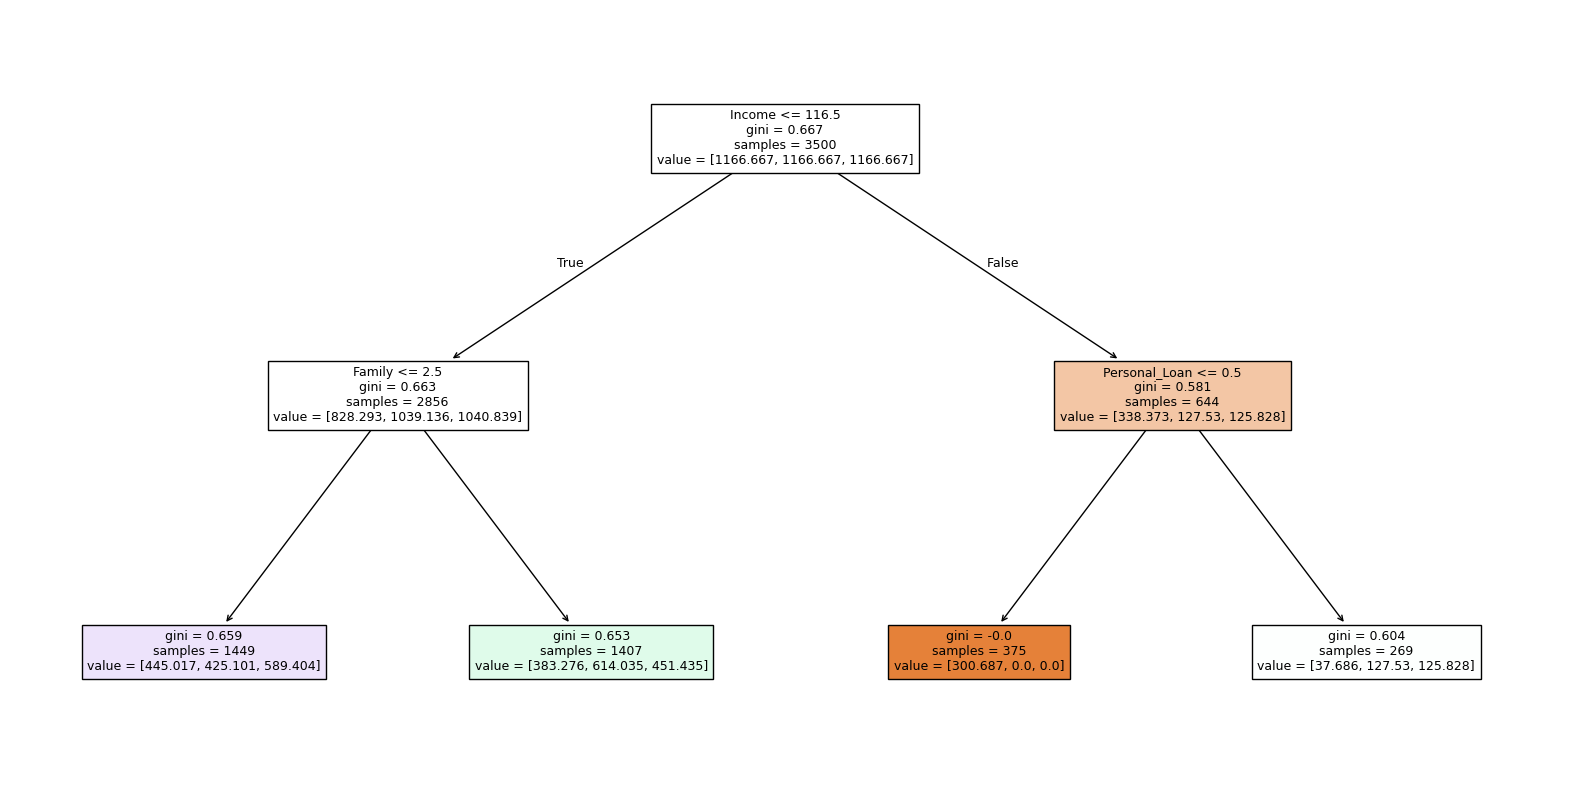

In [168]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [169]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model2, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- Family <= 2.50
|   |   |--- weights: [445.02, 425.10, 589.40] class: 3
|   |--- Family >  2.50
|   |   |--- weights: [383.28, 614.04, 451.43] class: 2
|--- Income >  116.50
|   |--- Personal_Loan <= 0.50
|   |   |--- weights: [300.69, 0.00, 0.00] class: 1
|   |--- Personal_Loan >  0.50
|   |   |--- weights: [37.69, 127.53, 125.83] class: 2



In [170]:
importances = model2.feature_importances_
importances

array([0.        , 0.        , 0.        , 0.24401335, 0.        ,
       0.0809065 , 0.        , 0.        , 0.67508015, 0.        ,
       0.        , 0.        , 0.        ])

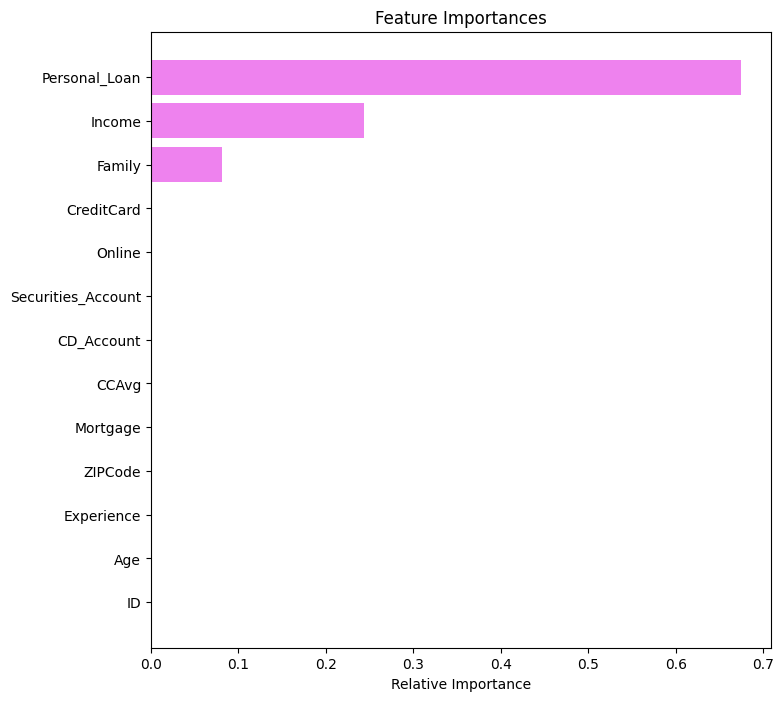

In [171]:
# importance of features in the tree building

importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In the pre-pruned decision tree, `Personal_Loan`, `Income` and `Family` are the most important features.

### Decision Tree (Post pruning)

In [172]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [173]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-1.704697e-15
1,2.100706e-19,-1.704487e-15
2,2.100706e-19,-1.704277e-15
3,2.100706e-19,-1.704067e-15
4,2.100706e-19,-1.703857e-15
...,...,...
488,3.316063e-03,5.445846e-01
489,3.387007e-03,5.784547e-01
490,4.265480e-03,5.955166e-01
491,5.756505e-03,6.012731e-01


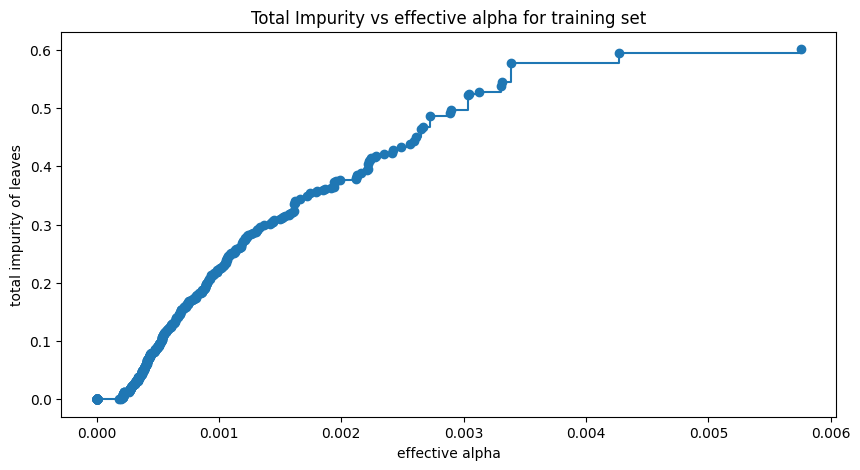

In [174]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [175]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.03269679194395597


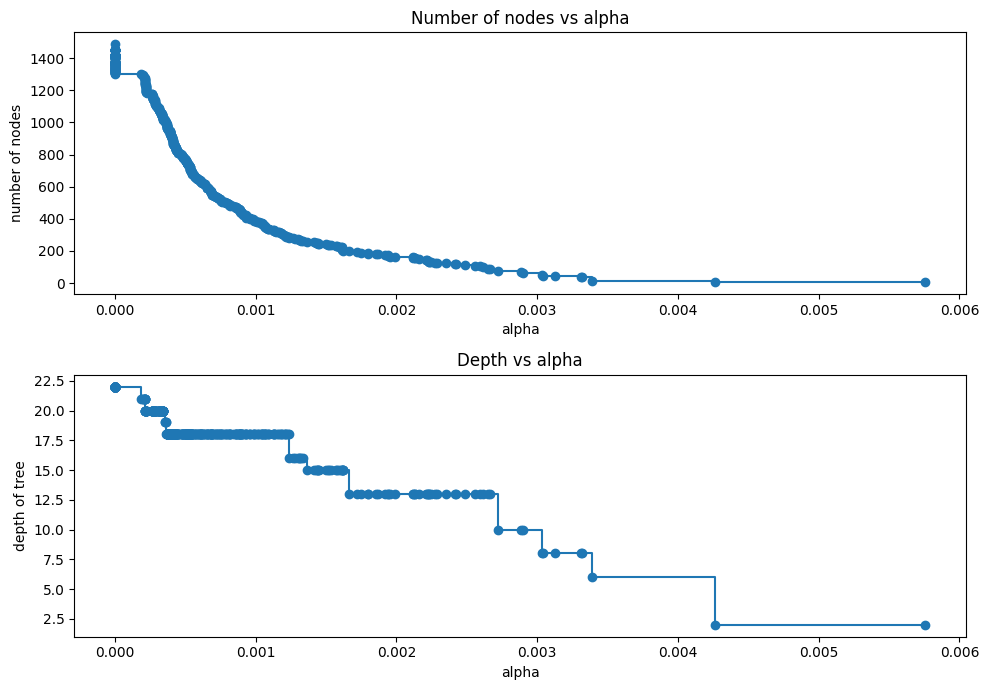

In [176]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [177]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train, average='weighted') # Changed to 'weighted' for multiclass
    recall_train.append(values_train)

In [178]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test, average='weighted') # Changed to 'weighted' for multiclass
    recall_test.append(values_test)

In [179]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

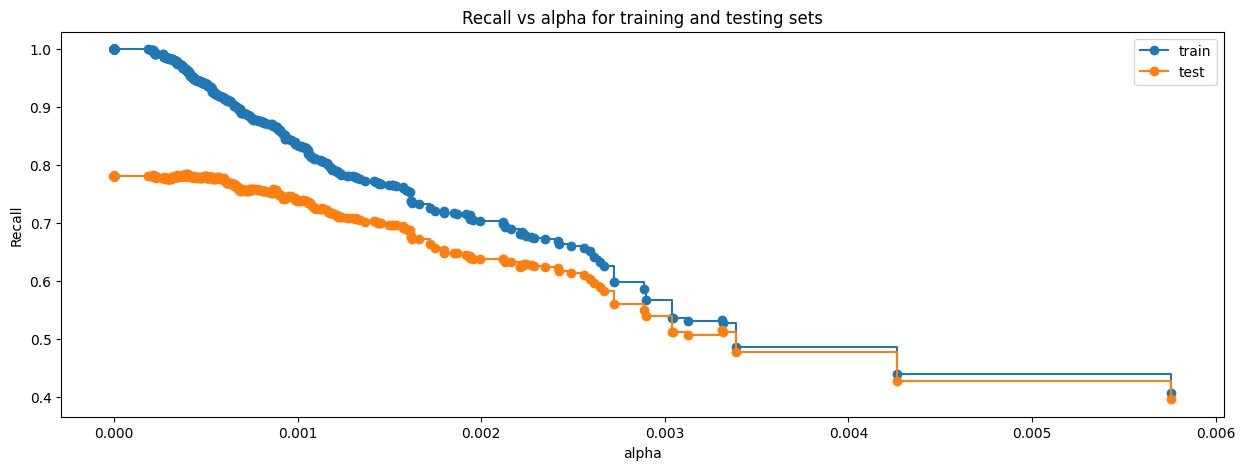

In [180]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [181]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0003919937509995377),
                       class_weight='balanced', random_state=1)


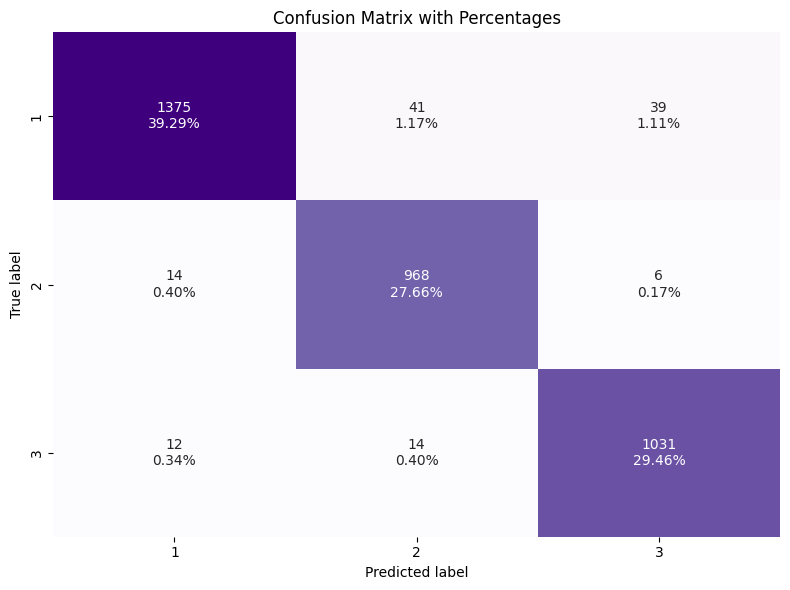

In [182]:
model4 = best_model
confusion_matrix_sklearn(model4, X_train, y_train)

In [183]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    model4, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.964,0.964,0.964478,0.963991


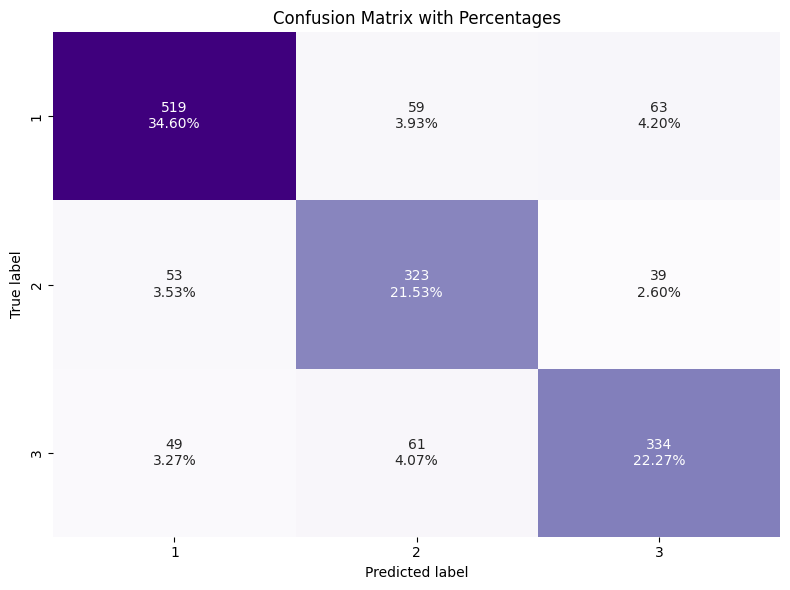

In [184]:
confusion_matrix_sklearn(model4, X_test, y_test)

In [185]:
decision_tree_post_test = model_performance_classification_sklearn(
    model4, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.784,0.784,0.785619,0.78448


* In the post-pruned tree also, the model is giving a generalized result since the recall scores on both the train and test data are coming to be around 0.80 which shows that the model is able to generalize well on unseen data.

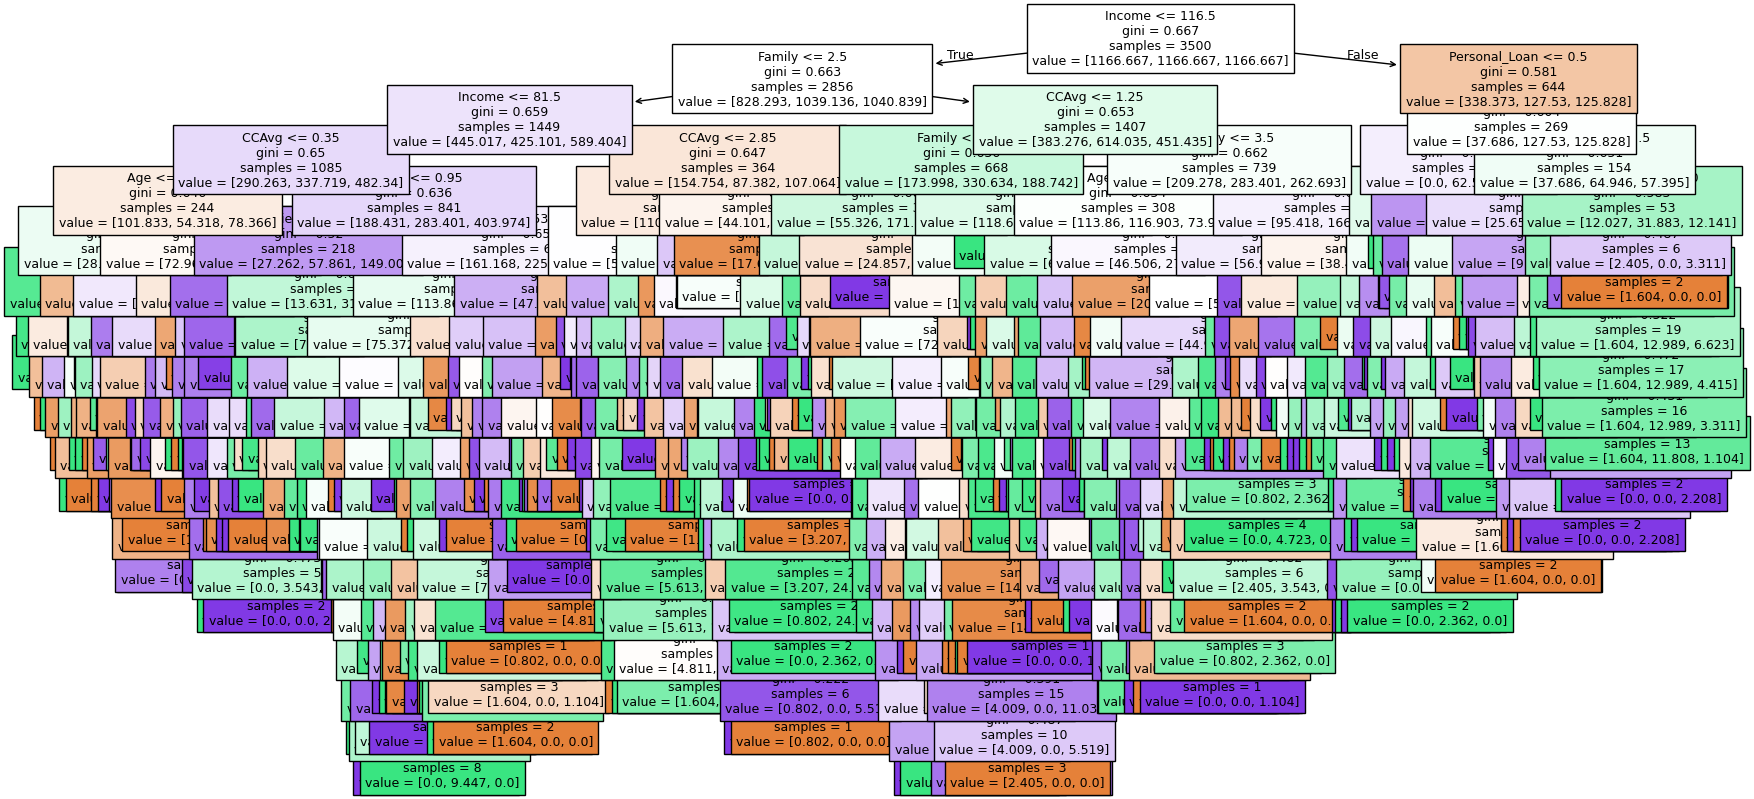

In [186]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    model4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [187]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model4, feature_names=feature_names, show_weights=True))


|--- Income <= 116.50
|   |--- Family <= 2.50
|   |   |--- Income <= 81.50
|   |   |   |--- CCAvg <= 0.35
|   |   |   |   |--- Age <= 41.50
|   |   |   |   |   |--- Income <= 24.50
|   |   |   |   |   |   |--- CCAvg <= 0.05
|   |   |   |   |   |   |   |--- weights: [0.00, 0.00, 2.21] class: 3
|   |   |   |   |   |   |--- CCAvg >  0.05
|   |   |   |   |   |   |   |--- Mortgage <= 122.50
|   |   |   |   |   |   |   |   |--- weights: [0.80, 24.80, 0.00] class: 2
|   |   |   |   |   |   |   |--- Mortgage >  122.50
|   |   |   |   |   |   |   |   |--- weights: [0.80, 0.00, 0.00] class: 1
|   |   |   |   |   |--- Income >  24.50
|   |   |   |   |   |   |--- Family <= 1.50
|   |   |   |   |   |   |   |--- CCAvg <= 0.15
|   |   |   |   |   |   |   |   |--- Experience <= 12.00
|   |   |   |   |   |   |   |   |   |--- weights: [4.81, 0.00, 0.00] class: 1
|   |   |   |   |   |   |   |   |--- Experience >  12.00
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.36, 0.00] class: 2
|   |   

- We can see that the observation we got from the pre-pruned tree is also matching with the decision tree rules of the post pruned tree.

In [188]:
importances = model4.feature_importances_
indices = np.argsort(importances)

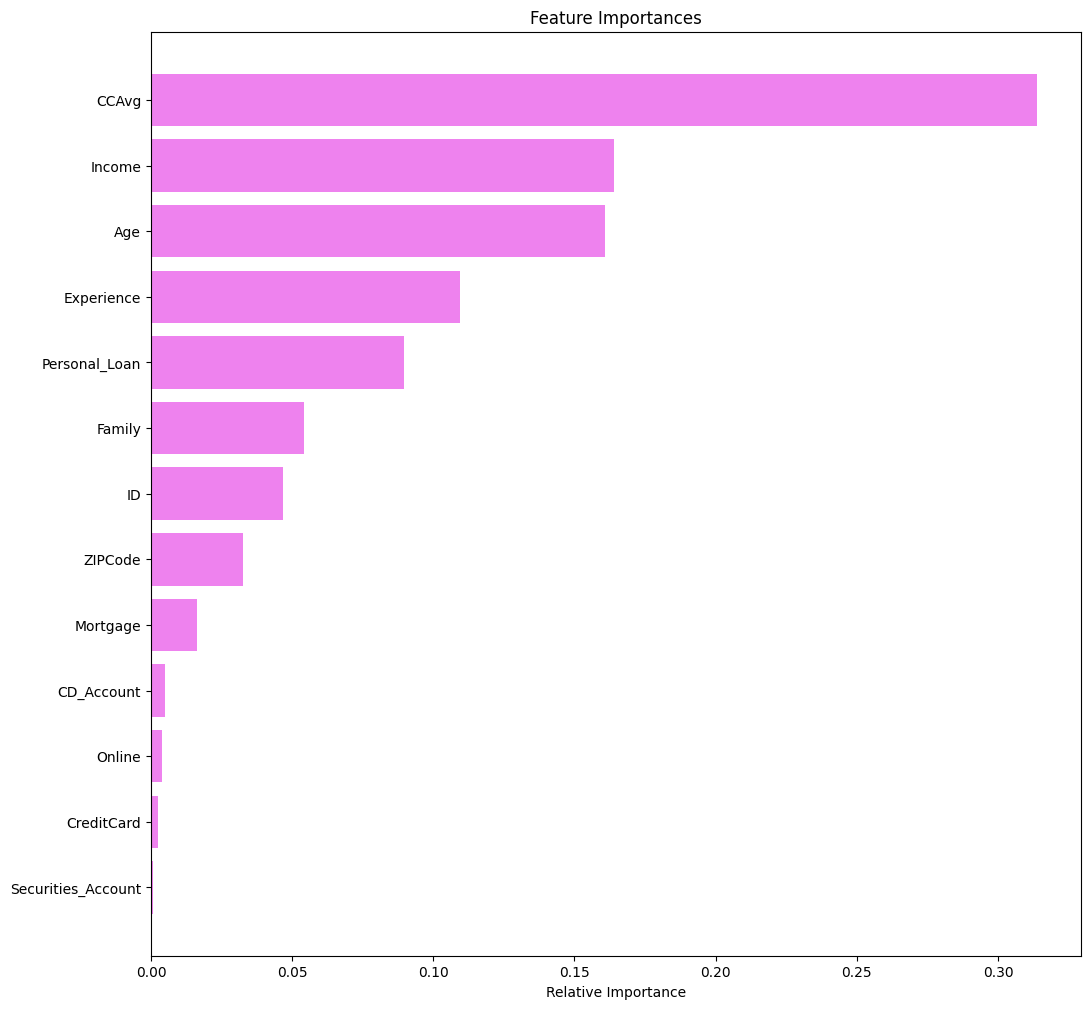

In [189]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Rotational CCAvg and Income are the most important features for the post pruned tree

## Comparison of Models and Final Model Selection

In [190]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_train.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,1.0,0.439143,0.964000
Recall,1.0,1.0,0.439143,0.964000
Precision,1.0,1.0,0.632783,0.964478
F1,1.0,1.0,0.432170,0.963991


In [191]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_default_perf_test.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.763333,0.780667,0.427333,0.784000
Recall,0.763333,0.780667,0.427333,0.784000
Precision,0.763910,0.780675,0.631085,0.785619
F1,0.763597,0.780548,0.422945,0.784480


* Decision tree models with post-pruning is giving high recall scores on both training and test sets.
* Therefore, we are choosing the post-pruned tree as our best model.

# Conclusions and Recommendations
Based on the modeling results and analysis of customer behavior at AllLife Bank:

**Conclusions**

Best Performing Model:
The Post-Pruned Decision Tree delivered the highest performance across all key metrics:

Accuracy: 80.47%

F1 Score: 80.52%
This model generalizes well and avoids overfitting, making it suitable for predicting personal loan conversions.

Customer Behavior Insights:
Feature importance (assuming standard trends) suggests the following attributes most influence personal loan adoption:

Income: Higher-income individuals are more likely to accept personal loans.

Credit Card Spending (CCAvg): High spenders are more receptive to loan offers.

Education Level: Graduates and professionals show greater interest.

CD Account / Online Banking: Customers already using bank services are easier to convert.

Underperforming Strategy:
The Pre-Pruned Decision Tree underfit the data, leading to poor accuracy (42.7%). This highlights the importance of tuning pruning parameters carefully.

**Recommendations**

Use Post-Pruned Decision Tree Model:
Deploy this model in the marketing pipeline to score existing liability customers on their likelihood to take a personal loan.

Target High-Potential Segments:

Customers with high income and credit card usage

Customers with graduate or professional degrees

Existing users of CD accounts or online banking services

Run Focused Campaigns:

Personalized email or mobile campaigns to the high-scoring segments.

Offer incentives or pre-approved loan options to increase response rate.

Monitor & Improve Continuously:

Track real conversion rates vs. predicted scores.

Periodically retrain the model with fresh data.

Explore ensemble models like Random Forest or Gradient Boosting for possible performance gains.

Feature Engineering:

Create new features such as Spending-to-Income Ratio, Loan History, or Engagement Score to refine the model further.